In [2]:
import urllib.request
import zipfile
import os
import shutil

In [3]:
# os.environ["CUDA_VISIBLE_DEVICES"]= "-1"

import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import cv2
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import SGD, Adam
# Mengaktifkan alokasi memori GPU yang tumbuh secara dinamis
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File image1.ppm dikonversi ke /content/drive/My Drive/S415/image1.png
File image2.ppm dikonversi ke /content/drive/My Drive/S415/image2.png
File image3.ppm dikonversi ke /content/drive/My Drive/S415/image3.png
File image4.ppm dikonversi ke /content/drive/My Drive/S415/image4.png
File image5.ppm dikonversi ke /content/drive/My Drive/S415/image5.png
File image6.ppm dikonversi ke /content/drive/My Drive/S415/image6.png
File image7.ppm dikonversi ke /content/drive/My Drive/S415/image7.png
File image8.ppm dikonversi ke /content/drive/My Drive/S415/image8.png
File image9.ppm dikonversi ke /content/drive/My Drive/S415/image9.png
File image10.ppm dikonversi ke /content/drive/My Drive/S415/image10.png
File image11.ppm dikonversi ke /content/drive/My Drive/S415/image11.png
File image12.ppm dikonversi ke /content/drive/My Drive/S415/image12.png


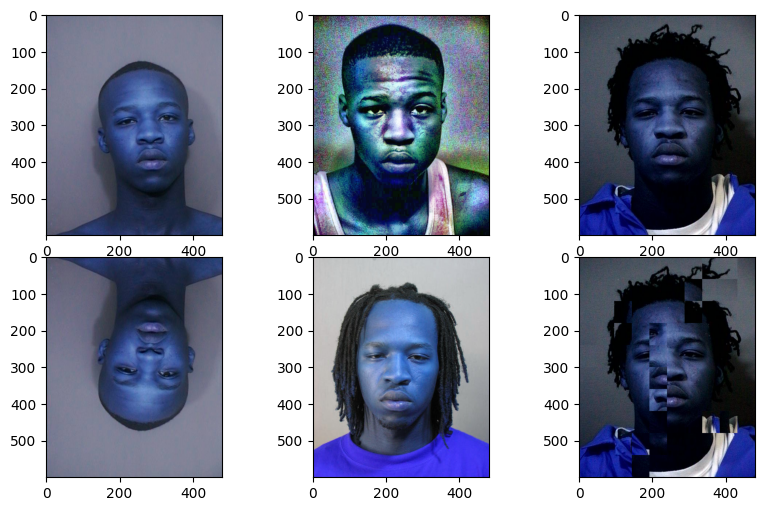

In [20]:
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive

image_dir = "/content/drive/My Drive/S415/"  # direktori dataset gambar via gdrive

# perintah buat konversi dari ppm ke png
for i in range(1, 13):  # Loop dari 1 sampai 12
    filename = f"image{i}.ppm"  # Buat nama file
    img_path = os.path.join(image_dir, filename)

    # Baca file .ppm
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

    # untuk konversi ke RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # untuk simpan sebagai file .png
    png_path = os.path.join(image_dir, filename[:-4] + ".png")  # Ganti ekstensi menjadi .png
    cv2.imwrite(png_path, img)

    print(f"File {filename} dikonversi ke {png_path}")

# menampilkan gambar
image_files = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(".png")]

# Randomly select 6 image files
if len(image_files) < 6:
    random_images = random.sample(image_files, len(image_files))
else:
    random_images = random.sample(image_files, 6)

# Create a 2x3 grid for displaying the images
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    # Gunakan cv2.imread untuk membaca file .png
    img = cv2.imread(random_images[i], cv2.IMREAD_UNCHANGED)  # Baca file .png
    if img is not None:  # Periksa apakah gambar berhasil dimuat
        # Konversi ke RGB jika diperlukan (tergantung format .png)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
    else:
        print(f"Error: File gambar tidak ditemukan atau tidak valid: {random_images[i]}")
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [21]:
#menentukan ukuran tinggi dan lebar gambar
height = 128
width = 128
dim = (width, height)

#mengumpulkan data citra yang akan dibuka dalam satu array
tampungan_data= []
tampungan_label=[]

# Karena semua gambar berada di direktori root
for i in range(1, 13):
    filename = f"image{i}.png"
    img_path = os.path.join(image_dir, filename)
    img = cv2.imread(img_path)  # Baca gambar .png

    #preprocessing data / segmentasi  boleh dilakukan disini
    resized=cv2.resize(img,dim, interpolation=cv2.INTER_LINEAR) #resize
    tampungan_data.append(resized/255.0) #menumpuk gambar blur pada array tampungan dan di sampling
    tampungan_label.append(filename[:-4])  # Ambil nama file tanpa ekstensi

X = np.array(tampungan_data)
y = np.array(tampungan_label)

In [22]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Fit label ke encoder
label_encoder.fit(y)

# Transformasi label teks menjadi angka
encoded_labels = label_encoder.transform(y)

# Tampilkan hasil
print("Label teks:", y)
print("Label termodifikasi:", encoded_labels)

# Kembalikan angka-angka ke label awal
decoded_labels = label_encoder.inverse_transform(encoded_labels)
print("Angka-angka yang dikembalikan ke label teks:", decoded_labels)
list_label=np.unique(y) #mendapatkan label unik
label_dict = {label: idx for idx, label in enumerate(list_label)} #masukkan dalam list
print(label_dict)

Label teks: ['image1' 'image2' 'image3' 'image4' 'image5' 'image6' 'image7' 'image8'
 'image9' 'image10' 'image11' 'image12']
Label termodifikasi: [ 0  4  5  6  7  8  9 10 11  1  2  3]
Angka-angka yang dikembalikan ke label teks: ['image1' 'image2' 'image3' 'image4' 'image5' 'image6' 'image7' 'image8'
 'image9' 'image10' 'image11' 'image12']
{'image1': 0, 'image10': 1, 'image11': 2, 'image12': 3, 'image2': 4, 'image3': 5, 'image4': 6, 'image5': 7, 'image6': 8, 'image7': 9, 'image8': 10, 'image9': 11}


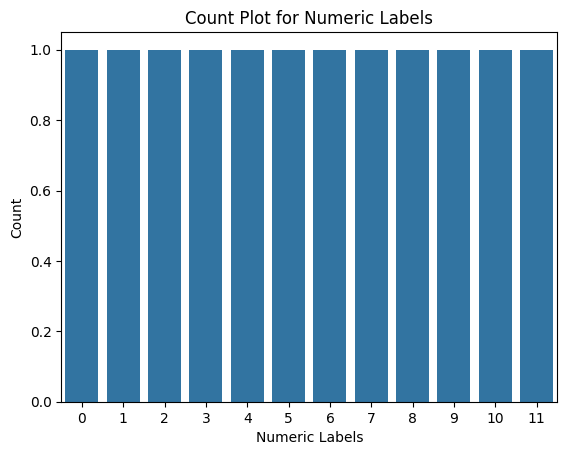

In [23]:
# Visualisasikan dalam jumlah dalam plot
sns.countplot(x=encoded_labels)
plt.xlabel('Numeric Labels')
plt.ylabel('Count')
plt.title('Count Plot for Numeric Labels')
plt.show()